In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and scale data
iris = load_iris()
X = iris.data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
def bisecting_kmeans(X, final_clusters=3, random_state=42):
    clusters = [np.arange(len(X))]  # initial cluster with all indices
    labels = np.zeros(len(X), dtype=int)

    while len(clusters) < final_clusters:
        # Step 3a: Select the largest cluster to split
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)

        # Step 3b: Apply KMeans with 2 clusters to it
        km = KMeans(n_clusters=2, random_state=random_state)
        km_labels = km.fit_predict(X[largest_cluster])

        # Step 3c: Separate indices into two sub-clusters
        cluster1 = largest_cluster[km_labels == 0]
        cluster2 = largest_cluster[km_labels == 1]

        # Step 3d: Add new clusters to the list
        clusters.append(cluster1)
        clusters.append(cluster2)

    # Step 4: Assign cluster labels to the original data
    for i, cluster in enumerate(clusters):
        labels[cluster] = i

    return labels

In [7]:
# Step 5: Apply Bisecting KMeans
final_clusters = 3
labels = bisecting_kmeans(X_scaled, final_clusters=final_clusters)

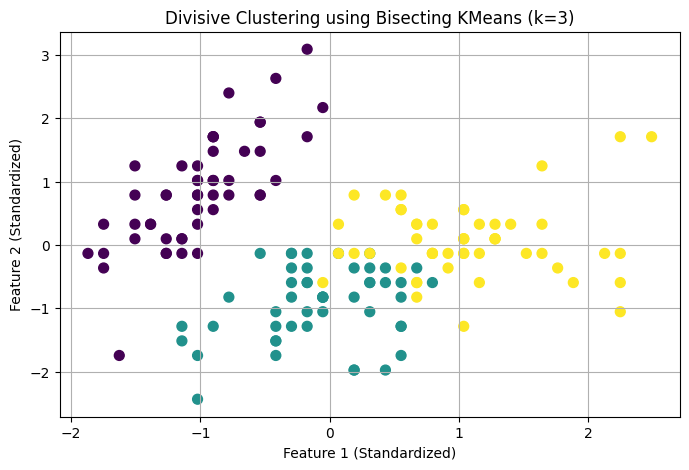

In [8]:
# Step 6: Visualize (using 1st two features)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f"Divisive Clustering using Bisecting KMeans (k={final_clusters})")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid(True)
plt.show()